- author: Macrina Lobo

- evaluate GRN

- remake Fig 4 

In [1]:
import os
import sys
import matplotlib.colors as colors
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scanpy as sc
import seaborn as sns
import celloracle as co

In [2]:
plt.rcParams["font.family"] = "arial"
plt.rcParams["figure.figsize"] = [9,6]
%config InlineBackend.figure_format = 'retina'
plt.rcParams["savefig.dpi"] = 600
%matplotlib inline

In [3]:
# Make folder to save plots
save_folder = "../results"

In [4]:
intermediate_dir = "/Users/LoboM/Dropbox/FINAL_CO/"

In [5]:
co_links = co.load_hdf5(file_path=intermediate_dir + "/links_filtered_new.celloracle.links")

In [96]:
# modified celloracle function
def plot_score_per_cluster_list(links, goi_list, save=None,settings=30000):
    """
    Plot network score for a specific gene.
    This function can be used to compare network score of a specific gene between clusters
    and get insight about the dynamics of the gene.
    Args:
        links (Links object): See network_analisis.Links class for detail.
        goi (srt): Gene name.
        save (str): Folder path to save plots. If the folder does not exist in the path, the function create the folder.
            If None plots will not be saved. Default is None.
    """
    #print(goi)
    #res = links.merged_score[links.merged_score.index==goi]
    #res = res.rename(
    #    columns={"betweenness_centrality": "betweenness\ncentrality"})
    # make plots
    #values = [ "betweenness\ncentrality"]
    #for i, value in zip([1, 2, 3,4], values):
        
        
      
    cnt = 1
    for goi in goi_list:
        plt.subplot(1, 5, cnt)
        
        print(goi)
        res = links.merged_score[links.merged_score.index==goi].copy()
        res = res.rename(
            columns={"betweenness_centrality": goi })
        # make plots
        values = [ goi ]
        
        # add 0 row to dataframe if gene not found
        for clus in range(28):
            if goi not in res[res['cluster']==str(clus)].index:
                    tmp3 = [0]*18
                    tmp3.extend(['NA',str(clus)])
                    res.loc[len(res.index)] = tmp3
                    idx = list(res.index)
                    idx[-1] = goi
                    res.index = idx
                    
        ax = sns.stripplot(data=res, y="cluster", x=values[0],
                      size=7, orient="h",linewidth=1, edgecolor="w",
                      order=links.palette.index.values,
                      palette=links.palette.palette.values)
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        ax.spines['bottom'].set_visible(False)
        ax.spines['left'].set_visible(False)
        ax.yaxis.grid(True)
        ax.tick_params(bottom=False,
                        left=False,
                        right=False,
                        top=False)
        if cnt > 1:
            plt.ylabel(None)
            ax.tick_params(labelleft=False)
        cnt = cnt + 1
        
    if not save is None:
        os.makedirs(save, exist_ok=True)
        path = os.path.join(save  + "gene_panel_centrality_new_norm_FINAL.pdf")
        plt.savefig(path, transparent=True)
    plt.show()

Foxn1
Gcm2
Pax8
Foxa2
Sox2


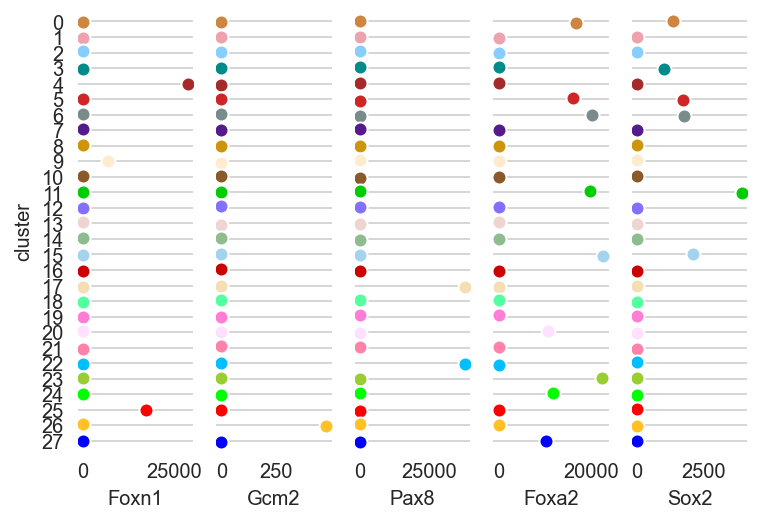

In [97]:
goi_list = ['Foxn1','Gcm2','Pax8','Foxa2','Sox2']
plot_score_per_cluster_list(co_links,goi_list=goi_list, save=intermediate_dir)